In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
header_list = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 
               'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

df = pd.read_csv('breast-cancer.csv',  names=header_list)
df = df.sample(frac=1)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score

In [62]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [63]:
categorical_features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 
               'node-caps', 'breast', 'breast-quad', 'irradiat']
numeric_features = ['deg-malig']

In [144]:
X, y = df[['age', 'menopause', 'tumor-size', 'inv-nodes', 
         'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']], df['Class']

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:
X_train.shape

(214, 9)

In [66]:
X_test.shape

(72, 9)

In [67]:
lr = Pipeline(steps=[ ('prepocessor', ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)), ('classification', LogisticRegression())])

# dt.fit(X_train, y_train)

# print("Accuracy",accuracy_score(y_test, dt.predict(X_test)))
# print("AUC", roc_auc_score(y_test, dt.predict(X_test)))

np.mean(cross_val_score(lr, X, y, cv=5, scoring='accuracy'))

0.6993950393224441

In [68]:
print()
cross_val_score(lr, X, y, cv=5, scoring='accuracy') 

array([0.67241379, 0.66666667, 0.70175439, 0.70175439, 0.75438596])

In [69]:
lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

                      precision    recall  f1-score   support

no-recurrence-events       0.73      0.87      0.79        46
   recurrence-events       0.65      0.42      0.51        26

            accuracy                           0.71        72
           macro avg       0.69      0.65      0.65        72
        weighted avg       0.70      0.71      0.69        72



In [11]:
dt = Pipeline(steps=[ ('prepocessor', ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)), ('classification', DecisionTreeClassifier())])

# dt.fit(X_train, y_train)

# print("Accuracy",accuracy_score(y_test, dt.predict(X_test)))
# print("AUC", roc_auc_score(y_test, dt.predict(X_test)))

np.mean(cross_val_score(dt, X, y, cv=5, scoring='accuracy'))

0.6643073200241985

In [15]:
np.mean(cross_val_score(dt, X, y, cv=5, scoring='roc_auc'))

0.6127690100430416

In [72]:
rf = Pipeline(steps=[ ('prepocessor', ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)), ('classification', RandomForestClassifier())])

rf.fit(X_train, y_train)

print("Accuracy",accuracy_score(y_test, rf.predict(X_test)))
print("AUC", roc_auc_score(y_test, rf.predict(X_test)))

Accuracy 0.75
AUC 0.6274509803921569


In [73]:
print("Accuracy", np.mean(cross_val_score(rf, X, y, cv=5, scoring='accuracy')))
print("AUC", np.mean(cross_val_score(rf, X, y, cv=5, scoring='roc_auc')))

Accuracy 0.7516031457955232
AUC 0.6973278335724533


In [76]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        51
           1       0.64      0.33      0.44        21

    accuracy                           0.75        72
   macro avg       0.70      0.63      0.64        72
weighted avg       0.73      0.75      0.72        72



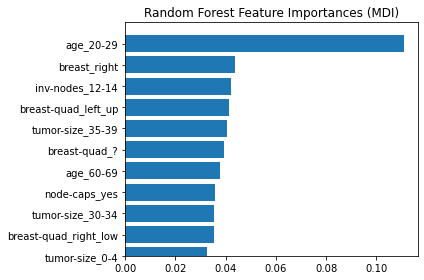

In [111]:
ohe = rf.named_steps["prepocessor"].named_transformers_["cat"]
feature_names = ohe.get_feature_names_out(categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = rf.named_steps["classification"].feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
ax.set_ylim([30, 41])
fig.tight_layout()
plt.savefig('figures/rf_feature_importance.png')
plt.show()

In [151]:
knn = Pipeline(steps=[ ('prepocessor', ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)), ('classification', KNeighborsClassifier(n_neighbors=4))])

knn.fit(X_train, y_train)

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84        52
           1       0.67      0.10      0.17        20

    accuracy                           0.74        72
   macro avg       0.70      0.54      0.51        72
weighted avg       0.72      0.74      0.66        72



In [161]:
knn = Pipeline(steps=[ ('prepocessor', ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)), ('classification', KNeighborsClassifier(n_neighbors=4))])

print("Accuracy", np.mean(cross_val_score(knn, X, y, cv=5, scoring='accuracy')))
print("AUC", np.mean(cross_val_score(knn, X, y, cv=5, scoring='roc_auc')))

Accuracy 0.7307924984875982
AUC 0.610925394548063


In [53]:
svc = Pipeline(steps=[ ('prepocessor', ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)), ('classification', SVC())])

svc.fit(X_train, y_train)

print("Accuracy",accuracy_score(y_test, svc.predict(X_test)))
print("AUC", roc_auc_score(y_test, svc.predict(X_test)))

Accuracy 0.7083333333333334
AUC 0.5280112044817927


In [90]:
print("Accuracy", np.mean(cross_val_score(svc, X, y, cv=3, scoring='accuracy')))
print("AUC", np.mean(cross_val_score(svc, X, y, cv=3, scoring='roc_auc')))

Accuracy 0.7483552631578947
AUC 0.6752996103227704
